In [17]:
import os
import pandas as pd 
import numpy 
import matplotlib.pyplot as plt
import seaborn as sns
from pltKorean_mac2 import Fontmanager

Fontmanager().set_font()

Using font : {self.ttf_path}
Set font to: Arial Unicode MS


In [2]:
data_path = "/Users/jun/GitStudy/commerceAB/data/thelook_ecommerce"
data_list = os.listdir(data_path)
data_list.sort()
data_list

['distribution_centers_gzip.parquet',
 'inventory_items_gzip.parquet',
 'order_items_gzip.parquet',
 'orders_gzip.parquet',
 'products_gzip.parquet',
 'users_gzip.parquet']

In [3]:
cols = [i.rstrip("_gzip.parquet") for i in data_list ]

cols

['distribution_centers',
 'inventory_items',
 'order_items',
 'orders',
 'products',
 'users']

In [ ]:
distribution_centers_file_path = data_path + "/distribution_centers_gzip.parquet"
distribution_centers_df = pd.read_parquet(distribution_centers_file_path, engine='pyarrow')  # 또는 engine='fastparquet

In [ ]:
inventory_items_file_path = data_path + "/inventory_items_gzip.parquet"
inventory_items_df = pd.read_parquet(inventory_items_file_path, engine='pyarrow')  # 또는 engine='fastparquet'

In [ ]:
order_items_file_path = data_path + "/order_items_gzip.parquet"
order_items_df = pd.read_parquet(order_items_file_path, engine='pyarrow')  # 또는 engine='fastparquet'

In [4]:
orders_file_path = data_path + "/orders_gzip.parquet"
orders_df = pd.read_parquet(orders_file_path, engine='pyarrow')  # 또는 engine='fastparquet'

In [ ]:
products_file_path = data_path + "/products_gzip.parquet"
products_df = pd.read_parquet(products_file_path, engine='pyarrow')  # 또는 engine='fastparquet'

In [ ]:
users_file_path = data_path + "/users_gzip.parquet"
users_df = pd.read_parquet(users_file_path, engine='pyarrow')  # 또는 engine='fastparquet'

In [5]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124599 entries, 0 to 124598
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   order_id      124599 non-null  Int64              
 1   user_id       124599 non-null  Int64              
 2   status        124599 non-null  object             
 3   gender        124599 non-null  object             
 4   created_at    124599 non-null  datetime64[ns, UTC]
 5   returned_at   12589 non-null   datetime64[ns, UTC]
 6   shipped_at    80886 non-null   datetime64[ns, UTC]
 7   delivered_at  43700 non-null   datetime64[ns, UTC]
 8   num_of_item   124599 non-null  Int64              
dtypes: Int64(3), datetime64[ns, UTC](4), object(2)
memory usage: 8.9+ MB


In [14]:
orders_df.describe(include='all',datetime_is_numeric=True)

,order_id,user_id,status,gender,created_at,returned_at,shipped_at,delivered_at,num_of_item
count,124599.0,124599.0,124599,124599,124599,12589,80886,43700,124599.0
unique,<NA>,<NA>,5,2,NaN,NaN,NaN,NaN,<NA>
top,<NA>,<NA>,Shipped,F,NaN,NaN,NaN,NaN,<NA>
freq,<NA>,<NA>,37186,62734,NaN,NaN,NaN,NaN,<NA>
mean,62300.0,49934.491208,NaN,NaN,2024-02-11 09:49:37.102870528+00:00,2024-02-17 09:36:46.777577472+00:00,2024-02-14 02:54:39.809930496+00:00,2024-02-15 12:59:05.400092672+00:00,1.450589
min,1.0,1.0,NaN,NaN,2019-01-13 17:33:00+00:00,2019-01-18 07:54:00+00:00,2019-01-14 05:45:00+00:00,2019-01-15 16:18:00+00:00,1.0
25%,31150.5,24990.0,NaN,NaN,2023-03-19 03:18:00+00:00,2023-03-26 01:17:00+00:00,2023-03-22 23:37:15+00:00,2023-03-25 02:18:00+00:00,1.0
50%,62300.0,49888.0,NaN,NaN,2024-07-20 17:13:00+00:00,2024-07-22 00:07:00+00:00,2024-07-24 07:39:00+00:00,2024-07-25 17:01:00+00:00,1.0
75%,93449.5,74925.0,NaN,NaN,2025-05-10 10:59:30+00:00,2025-05-12 21:08:00+00:00,2025-05-13 01:46:15+00:00,2025-05-14 17:03:00+00:00,2.0
max,124599.0,100000.0,NaN,NaN,2025-10-08 19:32:25.712857+00:00,2025-10-17 22:10:55.822944+00:00,2025-10-11 18:32:39.370171+00:00,2025-10-16 06:09:12.596329+00:00,4.0


In [7]:
orders_df.isnull().sum()

order_id             0
user_id              0
status               0
gender               0
created_at           0
returned_at     112010
shipped_at       43713
delivered_at     80899
num_of_item          0
dtype: int64

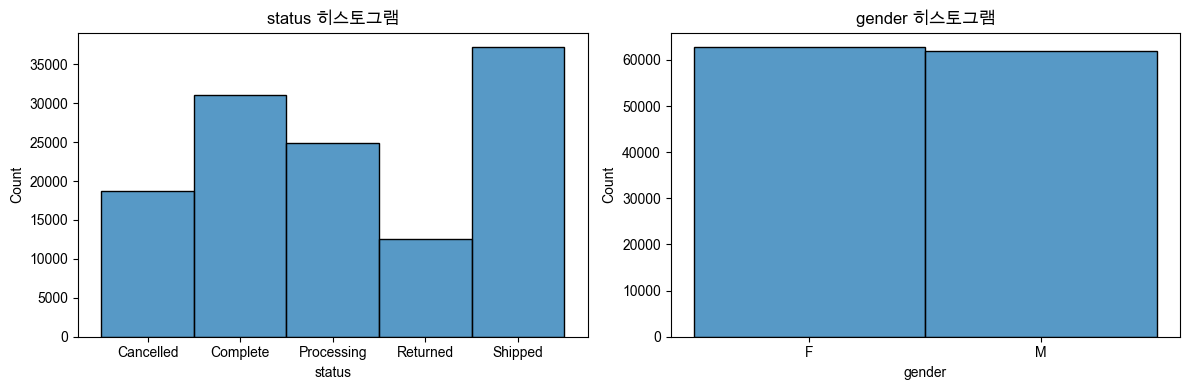

In [30]:
Categorical_cols = ['status','gender']

# 한 줄에 2개씩 subplot
fig, axes = plt.subplots(1, len(Categorical_cols), figsize=(12, 4))  # 1행, 컬럼 수 만큼
for ax, col in zip(axes, Categorical_cols):
    sns.histplot(orders_df[col], ax=ax)
    ax.set_title(f"{col} 히스토그램")

plt.tight_layout()  # 레이아웃 겹치지 않게 조정
plt.show()

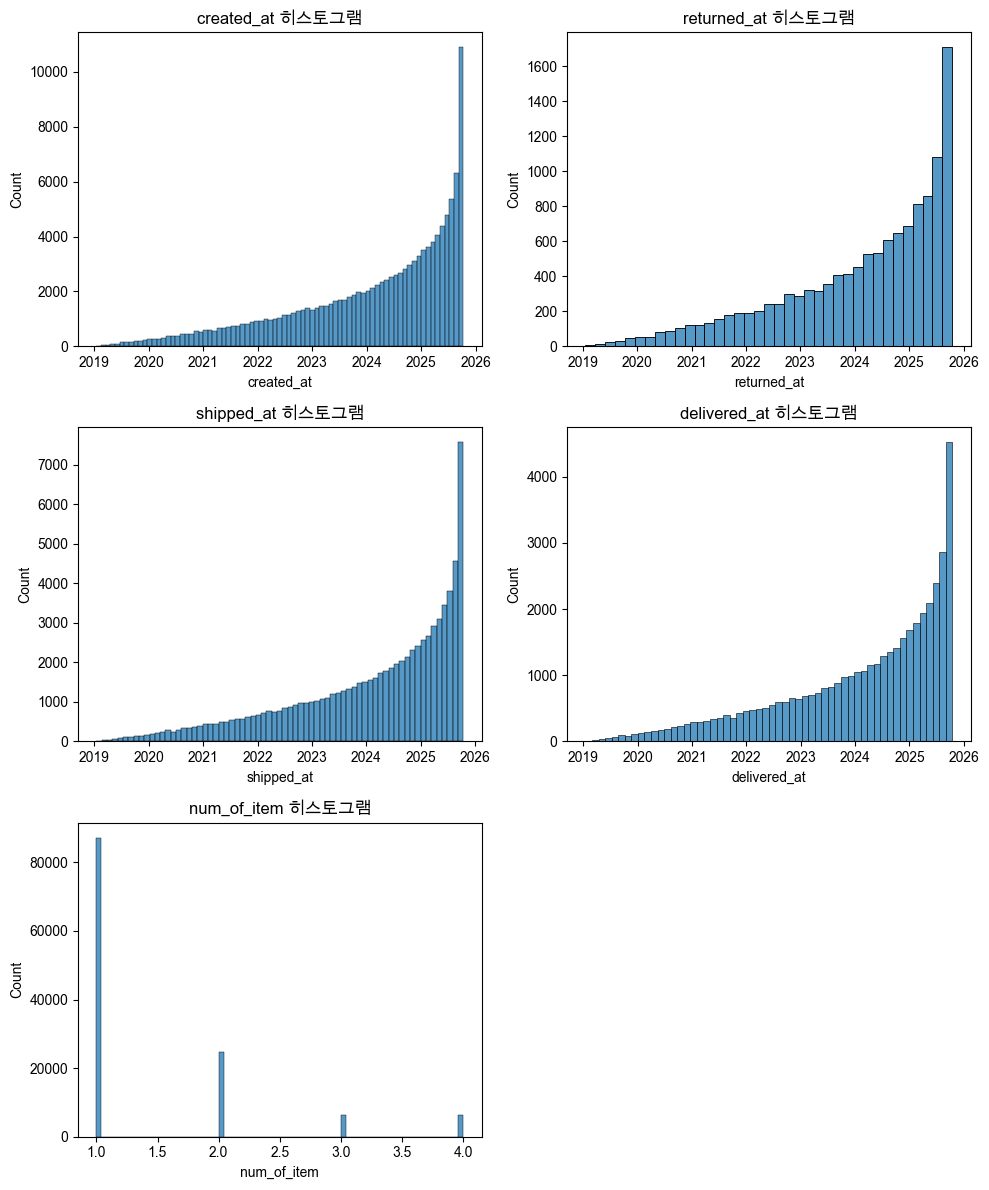

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['created_at','returned_at','shipped_at','delivered_at','num_of_item']

# 2행, 3열 (총 6개 공간) -> 컬럼 수에 맞게 조정
n_rows = 3
n_cols = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))
axes = axes.flatten()  # 2차원 배열 -> 1차원으로

for ax, col in zip(axes, cols):
    sns.histplot(orders_df[col], ax=ax)
    ax.set_title(f"{col} 히스토그램")

# 남는 subplot 제거
for ax in axes[len(cols):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

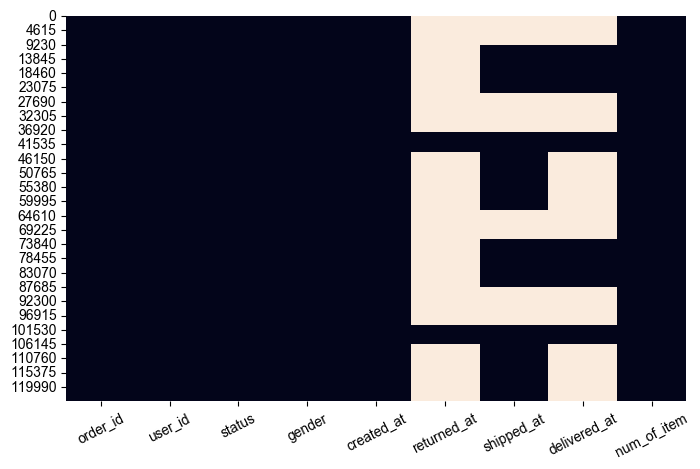

In [51]:
plt.figure(figsize=(8,5))  # 전체 그림 크기 지정
sns.heatmap(orders_df.isnull(), cbar=False)
plt.xticks(rotation=27)  # x축 라벨 기울이기
plt.show()

In [ ]:
# status shipped 인데, delivered_at 이 NaT인 경우는 뭐지?
# orders_df에서 status가 "Shipped"인데 delivered_at가 NaT인 경우는 상품이 아직 고객에게 배송 완료되지 않은 상태..!
# delivered at 으로 배송 출발 시간 > 도착시간 알 수 있겠는데 
orders_df2 = orders_df.copy()

# order 아이디는 같은데, shipped_at 이 다른 경우

,order_id,user_id,status,gender,created_at,returned_at,shipped_at,delivered_at,num_of_item
37519,1,1,Returned,F,2022-12-06 03:50:00+00:00,2022-12-11 13:58:00+00:00,2022-12-08 05:03:00+00:00,2022-12-10 09:23:00+00:00,1
37520,43,35,Returned,F,2021-11-19 02:30:00+00:00,2021-11-25 22:53:00+00:00,2021-11-21 08:21:00+00:00,2021-11-25 13:49:00+00:00,1
37521,44,36,Returned,F,2025-04-09 18:04:00+00:00,2025-04-17 03:59:00+00:00,2025-04-10 14:53:00+00:00,2025-04-15 06:49:00+00:00,1
37522,48,38,Returned,F,2022-11-07 12:27:00+00:00,2022-11-13 13:39:00+00:00,2022-11-10 09:12:00+00:00,2022-11-11 10:36:00+00:00,1
37523,55,44,Returned,F,2025-03-14 06:46:00+00:00,2025-03-18 12:34:00+00:00,2025-03-16 04:15:00+00:00,2025-03-17 15:19:00+00:00,1
...,...,...,...,...,...,...,...,...,...
106221,124510,99928,Returned,M,2025-03-26 09:14:00+00:00,2025-03-31 03:12:00+00:00,2025-03-29 01:27:00+00:00,2025-03-30 15:43:00+00:00,1
106222,124512,99932,Returned,M,2025-03-18 11:53:00+00:00,2025-03-24 12:15:00+00:00,2025-03-20 11:49:00+00:00,2025-03-22 10:29:00+00:00,1
106223,124513,99932,Returned,M,2024-10-05 11:53:00+00:00,2024-10-07 18:38:00+00:00,2024-10-06 00:25:00+00:00,2024-10-06 11:33:00+00:00,1
106224,124521,99940,Returned,M,2024-07-08 07:02:00+00:00,2024-07-13 15:53:00+00:00,2024-07-09 15:10:00+00:00,2024-07-11 11:29:00+00:00,1


In [ ]:
# created_at > shipped_at > delivered_at > returned_at 순서
orders_df[orders_df['delivered_at'] < orders_df['shipped_at']]

,order_id,user_id,status,gender,created_at,returned_at,shipped_at,delivered_at,num_of_item


In [60]:
orders_df['status'].unique()

array(['Cancelled', 'Complete', 'Processing', 'Returned', 'Shipped'],
      dtype=object)

In [ ]:
# Processing → Shipped → Complete

#orders_df[(orders_df['status'] == "Cancelled") & (orders_df['delivered_at'].notnull())] # 결과 없음 / Cancelled면, 전부 null
#orders_df[(orders_df['status'] == "Cancelled") & (orders_df['returned_at'].notnull())] # 결과 없음
#orders_df[(orders_df['status'] == "Cancelled") & (orders_df['shipped_at'].notnull())] # 결과 없음

#orders_df[(orders_df['status'] == "Complete") & (orders_df['delivered_at'].notnull())] # 결과 있음 / 31111 rows / Complete면, returned_at null 
#orders_df[(orders_df['status'] == "Complete") & (orders_df['returned_at'].notnull())] # 결과 없음
#orders_df[(orders_df['status'] == "Complete") & (orders_df['shipped_at'].notnull())] # 결과 있음 / 31111 rows

#orders_df[(orders_df['status'] == "Processing") & (orders_df['delivered_at'].notnull())] # 결과 없음 / Processing 이면 전부 null
#orders_df[(orders_df['status'] == "Processing") & (orders_df['returned_at'].notnull())] # 결과 없음
#orders_df[(orders_df['status'] == "Processing") & (orders_df['shipped_at'].notnull())] # 결과 없음

#orders_df[(orders_df['status'] == "Returned") & (orders_df['delivered_at'].notnull())] # 결과 있음 / 12589 rows / Returned면, null 없음
#orders_df[(orders_df['status'] == "Returned") & (orders_df['returned_at'].notnull())] # 결과 있음 / 12589 rows
#orders_df[(orders_df['status'] == "Returned") & (orders_df['shipped_at'].notnull())] # 결과 있음 / 12589 rows

#orders_df[(orders_df['status'] == "Shipped") & (orders_df['delivered_at'].notnull())] # 결과 없음
#orders_df[(orders_df['status'] == "Shipped") & (orders_df['returned_at'].notnull())] # 결과 없음
orders_df[(orders_df['status'] == "Shipped") & (orders_df['shipped_at'].notnull())] # 결과 있음 / 37186 rows / Shipped면 delivered_at, returned_at null


,order_id,user_id,status,gender,created_at,returned_at,shipped_at,delivered_at,num_of_item
43921,8,6,Shipped,F,2024-03-20 16:48:00+00:00,NaT,2024-03-22 18:07:00+00:00,NaT,1
43922,17,15,Shipped,F,2023-09-12 16:48:00+00:00,NaT,2023-09-14 12:48:00+00:00,NaT,1
43923,25,24,Shipped,F,2024-12-13 09:53:00+00:00,NaT,2024-12-14 18:09:00+00:00,NaT,2
43924,36,32,Shipped,F,2020-09-05 02:53:00+00:00,NaT,2020-09-07 01:26:00+00:00,NaT,1
43925,37,32,Shipped,F,2023-10-25 02:53:00+00:00,NaT,2023-10-25 16:22:00+00:00,NaT,1
...,...,...,...,...,...,...,...,...,...
124594,124564,99974,Shipped,M,2025-07-10 04:58:00+00:00,NaT,2025-07-11 03:43:00+00:00,NaT,1
124595,124571,99977,Shipped,M,2025-03-24 07:52:00+00:00,NaT,2025-03-27 01:46:00+00:00,NaT,2
124596,124574,99980,Shipped,M,2025-04-19 03:47:00+00:00,NaT,2025-04-22 00:19:00+00:00,NaT,2
124597,124588,99991,Shipped,M,2023-06-02 07:40:00+00:00,NaT,2023-06-02 09:18:00+00:00,NaT,1


취소된 주문들의 아이디 들을 

In [ ]:
cancelled_orders_df = orders_df[(orders_df['status'] == "Cancelled") & (orders_df['returned_at'].isnull())]
cancelled_orders_df

,order_id,user_id,status,gender,created_at,returned_at,shipped_at,delivered_at,num_of_item
0,18,15,Cancelled,F,2025-05-03 16:48:00+00:00,NaT,NaT,NaT,1
1,45,37,Cancelled,F,2025-10-07 02:21:25.180139+00:00,NaT,NaT,NaT,1
2,47,38,Cancelled,F,2020-01-26 12:27:00+00:00,NaT,NaT,NaT,1
3,49,38,Cancelled,F,2025-09-25 12:27:00+00:00,NaT,NaT,NaT,1
4,81,64,Cancelled,F,2025-08-11 17:58:00+00:00,NaT,NaT,NaT,3
...,...,...,...,...,...,...,...,...,...
72045,124549,99962,Cancelled,M,2025-09-05 09:58:00+00:00,NaT,NaT,NaT,1
72046,124553,99964,Cancelled,M,2024-05-23 10:10:00+00:00,NaT,NaT,NaT,1
72047,124572,99978,Cancelled,M,2023-02-11 08:27:00+00:00,NaT,NaT,NaT,1
72048,124595,99997,Cancelled,M,2022-11-26 17:10:00+00:00,NaT,NaT,NaT,1


In [127]:
# 성별별 returned 비율
# Returned 여부 컬럼 추가

returned_df = orders_df.groupby('gender').agg(
    total_orders= ('order_id', 'count'),
    returned_orders = ('is_returned','sum')
).reset_index()

returned_df['return_rate'] = returned_df['returned_orders'] / returned_df['total_orders']
print(returned_df)

  gender  total_orders  returned_orders  return_rate
0      F         62734             6402     0.102050
1      M         61865             6187     0.100008


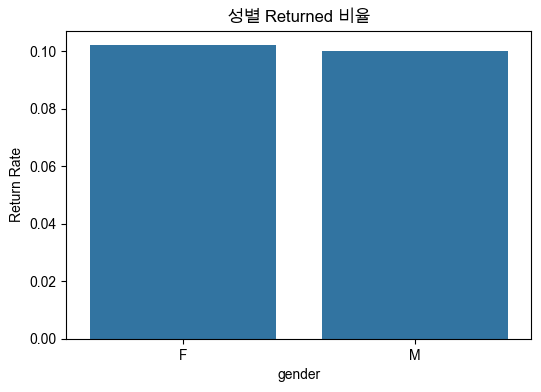

In [ ]:
orders_df[orders_df['order_id'].isin(cancelled_orders_df['order_id'])]

In [116]:
# 데이터 로드 및 시간대 변환
orders_df['created_at'] = pd.to_datetime(orders_df['created_at'])
orders_df['created_at_us'] = orders_df['created_at'].dt.tz_convert('America/New_York')
"""
tz_localize : 시리즈나 데이터프레임의 datetime이 타임존 정보가 없는 naive datetime일 때 사용합니다.
tz_convert : 이미 타임존 정보가 있는 datetime (aware datetime)을 다른 시간대로 변환할 때 사용합니다.
"""

# 시간대별 주문 및 취소 건수 집계
orders_df['created_hour'] = orders_df['created_at_us'].dt.hour
orders_df['created_day_of_week'] = orders_df['created_at_us'].dt.dayofweek
orders_df['created_month'] = orders_df['created_at_us'].dt.month



time_segments = ['Night', 'Morning', 'Lunch', 'Afternoon', 'Evening', 'Late Night']
time_bins = [0, 6, 10, 14, 18, 22, 24]  # 24로 끝나야 23시까지 포함됨

orders_df['created_time_segment'] = pd.cut(
    orders_df['created_hour'], 
    bins=time_bins, 
    labels=time_segments, 
    right=False,  # 왼쪽 포함, 오른쪽 제외
    include_lowest=True  # 0시 포함
)

In [117]:
# 따라서 A/B 테스트나 시간대별 분석을 할 때는 다음을 고려할 수 있습니다:
# 취소 여부 컬럼
orders_df['is_cancelled'] = orders_df['status'] == 'Cancelled'
orders_df['is_returned'] = orders_df['returned_at'].notnull()

In [118]:
# 성별·시간대별 집계
agg_df = orders_df.groupby(['gender', 'created_time_segment']).agg(
    total_orders=('order_id', 'count'),
    cancelled_orders=('is_cancelled', 'sum')
).reset_index()

agg_df['cancel_rate'] = agg_df['cancelled_orders'] / agg_df['total_orders']

In [119]:
print(agg_df)

   gender created_time_segment  total_orders  cancelled_orders  cancel_rate
0       F                Night         19703              2934     0.148911
1       F              Morning         13145              2000     0.152149
2       F                Lunch         13289              2009     0.151178
3       F            Afternoon          2425               345     0.142268
4       F              Evening          7500              1123     0.149733
5       F           Late Night          6672              1044     0.156475
6       M                Night         19629              3058     0.155790
7       M              Morning         12890              1890     0.146625
8       M                Lunch         13099              1979     0.151080
9       M            Afternoon          2487               381     0.153197
10      M              Evening          7180              1034     0.144011
11      M           Late Night          6580               974     0.148024


미국 동부 시간대는 **Daylight Saving Time (DST, 서머타임)**을 적용하니까, 변환할 때 DST 고려해서 자동 조정돼. (pandas가 내부적으로 알아서 처리해 줘)

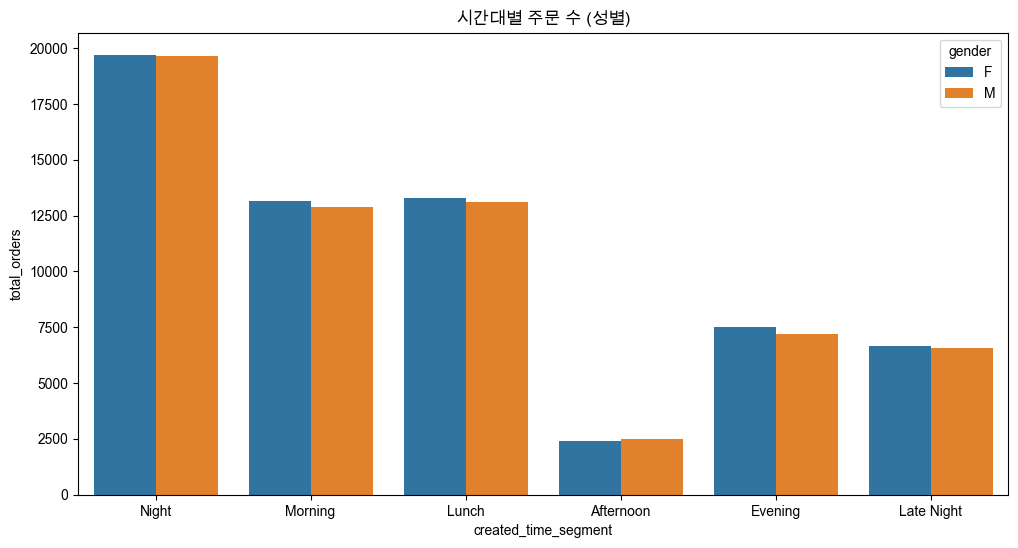

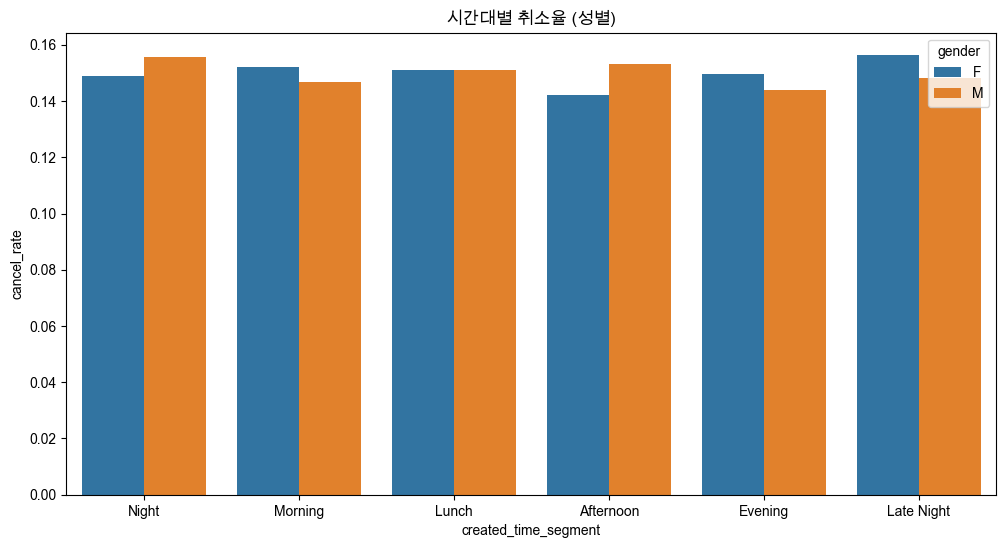

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=agg_df, x='created_time_segment', y='total_orders', hue='gender')
plt.title('시간그룹 별 주문 수 (성별)')
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(data=agg_df, x='created_time_segment', y='cancel_rate', hue='gender')
plt.title('시간그룹 별 취소율 (성별)')
plt.show()

In [123]:
# 성별·시간대별 집계
agg_df = orders_df.groupby(['gender', 'created_hour']).agg(
    total_orders=('order_id', 'count'),
    cancelled_orders=('is_cancelled', 'sum')
).reset_index()

agg_df['cancel_rate'] = agg_df['cancelled_orders'] / agg_df['total_orders']

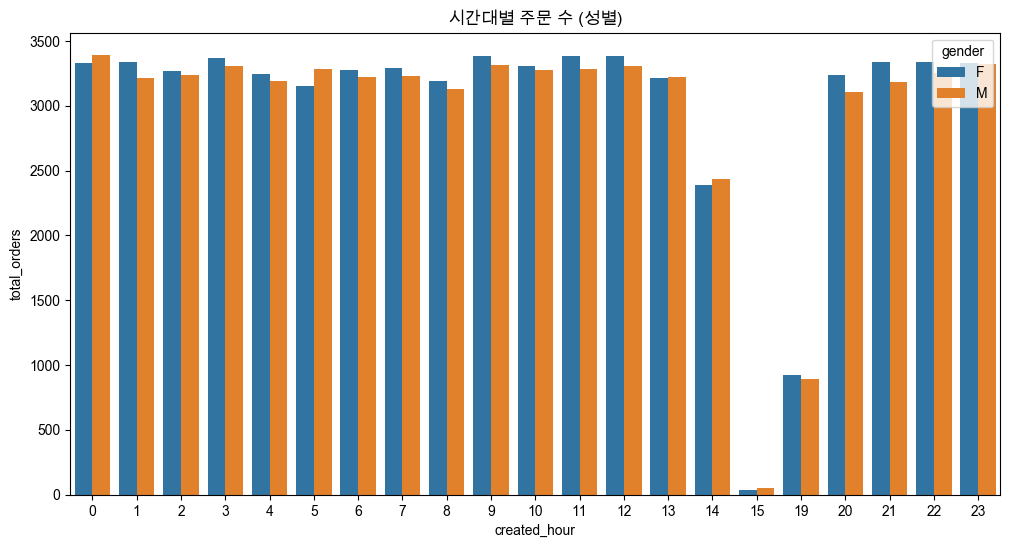

In [124]:
plt.figure(figsize=(12,6))
sns.barplot(data=agg_df, x='created_hour', y='total_orders', hue='gender')
plt.title('시간대별 주문 수 (성별)')
plt.show()

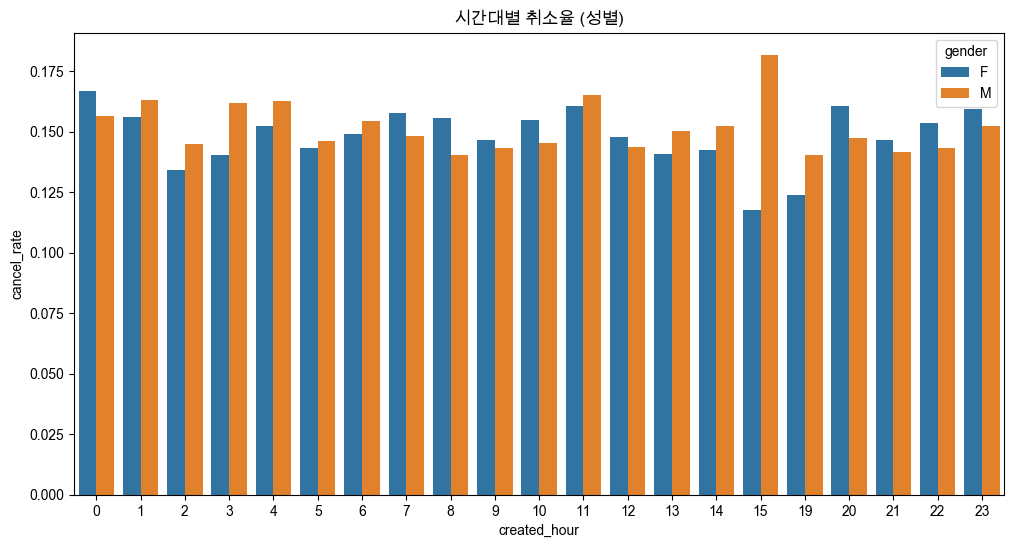

In [ ]:
#(정규화 필요할 것 같음)
plt.figure(figsize=(12,6))
sns.barplot(data=agg_df, x='created_hour', y='cancel_rate', hue='gender')
plt.title('시간대별 취소율 (성별)')
plt.show()